# SUPERVISED LEARNING(CLASSIFICATION)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\archive\\kidney_disease.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


feature | Description
----------|------
id | patient_id
age | patient_age
bp |patient_bloodpressure
sg | patient_specific_gravity(Urine specific gravity is a laboratory test that shows the concentration of all chemical                                               particles in the urine)
al | patient_Albumin(Albumin is the protein found in the blood)
su | patient_Sugar
rbc | patient_red_blood_cells
pc | puss cells(Pus is a thick, discolored (white, yellow, pink or green) fluid that your body makes to help fight off an                           infection)
pcc | puss_cell_clamps
ba | bacteria
bgr | blood_glucose_random
bu | blood_urea
sc | serum creatinine
sod | sodium
pot | potassium
hemo | hemoglobin
pcv | packed cell volume
wc | white blood cells count
rc | red blood cells count
htn | hypertension
dm | diabetes mellitus
cad | coronary artery disease
appet | appetite
pe | pedal edema
ane | anemia
classification 


# DATA CLEANING

In [5]:
df[df.duplicated()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [6]:
#Setting id as index
df.set_index('id',inplace = True)

In [7]:
for i in df.columns:
    if i == 'int32' or 'float64':
        print(i)
        print("..................")
        print(df[i].unique())
        print(df[i].info())
        print(df[i].isnull().sum())
        print(df[i].describe())
    elif i == 'object':
        print(i)
        print("..................")
        print(df[i].unique())
        print(df[i].info())
        print(df[i].isnull().sum())

age
..................
[48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
<class 'pandas.core.series.Series'>
Int64Index: 400 entries, 0 to 399
Series name: age
Non-Null Count  Dtype  
--------------  -----  
391 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
None
9
count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: age, dtype: float64
bp
..................
[ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
<class 'pandas.core.series.Series'>
Int64Index: 400 entries, 0 to 399
Series name: bp
Non-Null Count  Dtype  
--------------  -----  
388 non-null    float64
dtypes: float64(1)
memory usage: 6

In [8]:
df['pcv'].replace({'\t?': np.nan ,'\t43':'43'}).unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [9]:
df['pcv']=df['pcv'].replace({'\t?': np.nan ,'\t43':'43'})

In [10]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [11]:
df['wc'].replace({'\t6200': 6200 ,'\t8400':'8400','\t?': np.nan}).unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', 6200, '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '10500', '4200', '4700',
       '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '12300', '16700', '2600', '26400', '8800', '7400', '4900', '8000',
       '12000', '15700', '4100', '5700', '11500', '5400', '10800', '9900',
       '5200', '5900', '9300', '9700', '5100', '6600'], dtype=object)

In [12]:
df['wc']=df['wc'].replace({'\t6200': 6200 ,'\t8400':'8400','\t?': np.nan}).astype(float)

In [13]:
df['rc'].replace({'\t?':np.nan}).unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '5.4', '6.1',
       '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9',
       '6.5'], dtype=object)

In [14]:
df['rc']=df['rc'].replace({'\t?':np.nan}).astype(float)

In [15]:
df['dm'].str.replace("\tno","no").str.replace("\tyes","yes").str.replace(" yes",'yes').unique()

array(['yes', 'no', nan], dtype=object)

In [16]:
df['dm']=df['dm'].str.replace("\tno","no").str.replace("\tyes","yes").str.replace(" yes","yes")

In [17]:
df['cad'].str.replace("\tno","no").unique()

array(['no', 'yes', nan], dtype=object)

In [18]:
df['cad']=df['cad'].str.replace("\tno","no")

In [19]:
df['classification'].str.replace("ckd\t","ckd").unique()

array(['ckd', 'notckd'], dtype=object)

In [20]:
df['classification']=df['classification'].str.replace("ckd\t","ckd")

# MISSING VALUES

In [21]:
df['age'].fillna(df['age'].median(),inplace = True)
df['bp'].fillna(df['bp'].median(),inplace = True)
df['sg'].fillna(df['sg'].mean(),inplace = True)
df['al'].fillna(df['al'].median(),inplace = True)
df['su'].fillna(df['su'].median(),inplace = True)
df['rbc'].fillna(df['rbc'].mode()[0],inplace = True)
df['pc'].fillna(df['pc'].mode()[0],inplace = True)
df['pcc'].fillna(df['pcc'].mode()[0],inplace = True)
df['ba'].fillna(df['ba'].mode()[0],inplace = True)
df['bgr'].fillna(df['bgr'].median(),inplace = True)
df['bu'].fillna(df['bu'].median(),inplace = True)
df['sc'].fillna(df['sc'].median(),inplace = True)
df['sod'].fillna(df['sod'].mean(),inplace = True)
df['pot'].fillna(df['pot'].median(),inplace = True)
df['hemo'].fillna(df['hemo'].mean(),inplace = True)
df['pcv'].fillna(df['pcv'].mode()[0],inplace = True)
df['wc'].fillna(df['wc'].mean(),inplace = True)
df['rc'].fillna(df['rc'].mean(),inplace = True)
df['htn'].fillna(df['htn'].mode()[0],inplace = True)
df['dm'].fillna(df['dm'].mode()[0],inplace = True)
df['cad'].fillna(df['cad'].mode()[0],inplace = True)
df['appet'].fillna(df['appet'].mode()[0],inplace = True)
df['pe'].fillna(df['pe'].mode()[0],inplace = True)
df['ane'].fillna(df['ane'].mode()[0],inplace = True)
df['classification'].fillna(df['classification'].mode()[0],inplace = True)

In [22]:
df['age'] = df['age'].astype(int)
df['bp'] = df['bp'].astype(int)
df['al'] = df['al'].astype(int)
df['su'] = df['su'].astype(int)
df['bgr'] = df['bgr'].astype(int)
df['bu'] = df['bu'].astype(float)
df['sc'] = df['sc'].astype(float)
df['sod'] = df['sod'].astype(float)
df['pot'] = df['pot'].astype(int)
df['hemo'] = df['hemo'].astype(int)
df['pcv'] = df['pcv'].astype(int)

In [23]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# EDA

In [24]:
for i in df.columns:
    if df[i].dtype == 'int32' or df[i].dtype =='int64':
        print(i)
        print('.......')
        print(df[i].value_counts())
        print(df[i].describe())
    elif df[i].dtype == 'float64':
        print(i)
        print('.........')
        print(df[i].describe())
    elif df[i].dtype == 'object':
        print(i)
        print('.......')
        print(df[i].value_counts())
        

age
.......
55    21
60    19
65    17
48    12
50    12
      ..
83     1
27     1
14     1
81     1
79     1
Name: age, Length: 76, dtype: int64
count    400.000000
mean      51.562500
std       16.982996
min        2.000000
25%       42.000000
50%       55.000000
75%       64.000000
max       90.000000
Name: age, dtype: float64
bp
.......
80     128
70     112
60      71
90      53
100     25
50       5
110      3
140      1
180      1
120      1
Name: bp, dtype: int64
count    400.000000
mean      76.575000
std       13.489785
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
max      180.000000
Name: bp, dtype: float64
sg
.........
count    400.000000
mean       1.017408
std        0.005369
min        1.005000
25%        1.015000
50%        1.017408
75%        1.020000
max        1.025000
Name: sg, dtype: float64
al
.......
0    245
1     44
2     43
3     43
4     24
5      1
Name: al, dtype: int64
count    400.00000
mean       0.90000
std        1.3

UNIVAIRATE INSIGHTS:


    * Most of the people are of age 50 and above
    * Most of the people have bp around 70 to 80 and outliers are present.
    * There is no much difference in the specific gravity,min,25%,50%,75% are mostly same.
    * Most of the people have 60 and above percentage of Albumin
    * Most of the people does not have sugar.
    * Most of the people rbc are normal
    * Most of the people pc are normal
    * Most of the people does not have pcc
    * Most of the people does not have bacteria
    * 121 is the blood glucose random level present in most of the people.
    * 42 is the blood urea level observed in most of the people
    * Most of the people have serum creatinine have 1.2
    * Average sodium percentage is 137.52
    * Most of the people have 4,3, and 5 % levels of potasssium
    * Most of the people have 12% of hemoglobin
    * Average of pcv is 39.2
    * Average of wc is 8406
    * Average of rc is 4.7
    * Most of the people does not hypertention
    * Most of the people does not diabiates
    * Most of the people does not cod
    * Most of the people are Maintaining good Appetite
    * Most of the people does not pedal edema
    * Most of the people does not anemia

BI-VARIATE ANALAYSIS

In [25]:
df.groupby(['classification'])['bp'].mean()

classification
ckd       79.640000
notckd    71.466667
Name: bp, dtype: float64

In [26]:
df.groupby(['classification'])['sg'].mean()

classification
ckd       1.014505
notckd    1.022247
Name: sg, dtype: float64

In [27]:
df.groupby(['classification'])['al'].mean()

classification
ckd       1.44
notckd    0.00
Name: al, dtype: float64

In [28]:
df.groupby(['classification'])['su'].mean()

classification
ckd       0.632
notckd    0.000
Name: su, dtype: float64

In [29]:
df.groupby(['classification'])['bgr'].mean()

classification
ckd       167.148000
notckd    108.253333
Name: bgr, dtype: float64

In [30]:
df.groupby(['classification'])['bu'].mean()

classification
ckd       70.808800
notckd    33.166667
Name: bu, dtype: float64

In [31]:
df.groupby(['classification'])['sc'].mean()

classification
ckd       4.265400
notckd    0.883333
Name: sc, dtype: float64

In [32]:
df.groupby(['classification'])['sod'].mean()

classification
ckd       135.091431
notckd    141.590958
Name: sod, dtype: float64

In [33]:
df.groupby(['classification'])['pot'].mean()

classification
ckd       4.272000
notckd    3.853333
Name: pot, dtype: float64

In [34]:
df.groupby(['classification'])['hemo'].mean()

classification
ckd       10.548000
notckd    14.653333
Name: hemo, dtype: float64

In [35]:
df.groupby(['classification'])['pcv'].mean()

classification
ckd       35.100000
notckd    46.193333
Name: pcv, dtype: float64

In [36]:
df.groupby(['classification'])['wc'].mean()

classification
ckd       8806.824490
notckd    7738.285714
Name: wc, dtype: float64

In [37]:
df.groupby(['classification'])['rc'].mean()

classification
ckd       4.323288
notckd    5.347680
Name: rc, dtype: float64

In [38]:
#C_C
pd.crosstab(df.classification, df.rbc, margins=True)

rbc,abnormal,normal,All
classification,,,
ckd,47,203,250
notckd,0,150,150
All,47,353,400


In [39]:
pd.crosstab(df.classification, df.pc, margins=True)

pc,abnormal,normal,All
classification,,,
ckd,76,174,250
notckd,0,150,150
All,76,324,400


In [40]:
pd.crosstab(df.classification, df.pcc, margins=True)

pcc,notpresent,present,All
classification,,,
ckd,208,42,250
notckd,150,0,150
All,358,42,400


In [41]:
pd.crosstab(df.classification, df.ba, margins=True)

ba,notpresent,present,All
classification,,,
ckd,228,22,250
notckd,150,0,150
All,378,22,400


In [42]:
pd.crosstab(df.classification, df.htn, margins=True)

htn,no,yes,All
classification,,,
ckd,103,147,250
notckd,150,0,150
All,253,147,400


In [43]:
pd.crosstab(df.classification, df.dm, margins=True)

dm,no,yes,All
classification,,,
ckd,113,137,250
notckd,150,0,150
All,263,137,400


In [44]:
pd.crosstab(df.classification, df.cad, margins=True)

cad,no,yes,All
classification,,,
ckd,216,34,250
notckd,150,0,150
All,366,34,400


In [45]:
pd.crosstab(df.classification, df.appet, margins=True)

appet,good,poor,All
classification,,,
ckd,168,82,250
notckd,150,0,150
All,318,82,400


In [46]:
pd.crosstab(df.classification, df.pe, margins=True)

pe,no,yes,All
classification,,,
ckd,174,76,250
notckd,150,0,150
All,324,76,400


In [47]:
pd.crosstab(df.classification, df.ane, margins=True)

ane,no,yes,All
classification,,,
ckd,190,60,250
notckd,150,0,150
All,340,60,400


BIVARIATE INSIGHTS:
 * People who have high Bp has kidney disease.
 * People who have Albumin has kidney disease.
 * People who have sugar has higher chance of getting kidney disease.
 * people whose blood glucose random is high has higher chance of getting kidney disease.
 * People whose have high blood urea has higher chance of getting kidney disease.
 * People who have high serum creatinine has higher chance of getting kidney disease.
 * Specific gravity,potassium,does not has much impact on CkD.
 * People with low hemoglobin has higher chance of getting CKD.
 * People whose packed less volume is low has higher chance of getting CKD.
 * People who have high white blood cells has higher chance of getting CKD.
 * People who have less red blood cells has higher chance of getting CKD.
 * People whose red blood cells are abnormal has higher chance of getting CKD.
 * People whose puss cells are abnormal has CKD.
 * People who have high puss cell clamps has CKD.
 * People who have high bacteria has CKD.
 * People who have hypertention has CKD.
 * People who have diabetes mellitus has CKD.
 * People who have coronary artery disease has CKD.
 * People who have poor appet has higher chance of getting CKD.
 * People who have pedal edema has CKD.
 * People who have anemia has CKD.

# OUTLIERS

In [48]:
import seaborn as sns

Column : age


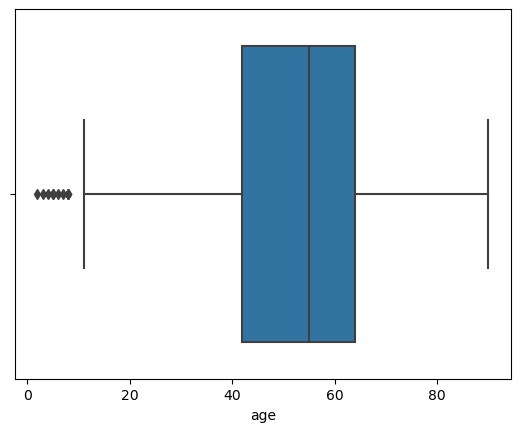

**************************************************
Column : bp


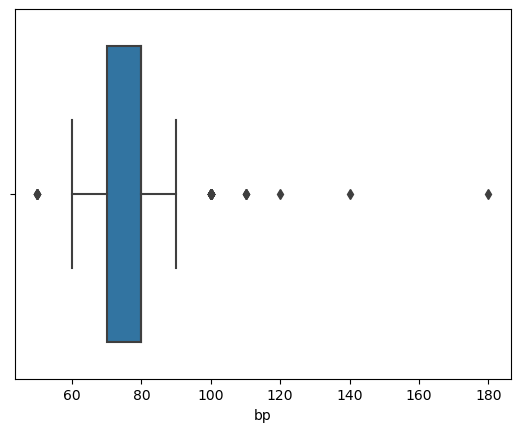

**************************************************
Column : sg


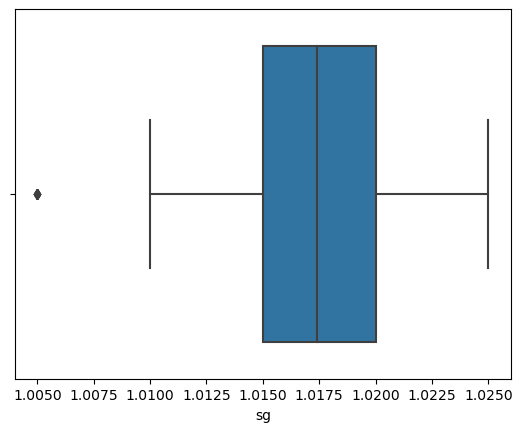

**************************************************
Column : al


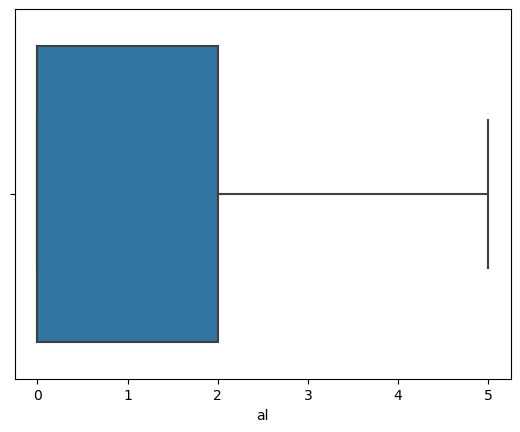

**************************************************
Column : su


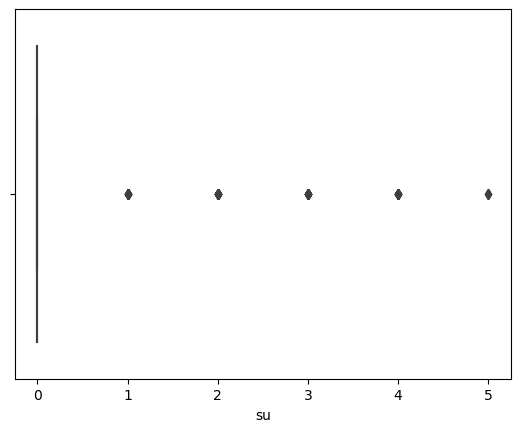

**************************************************
Column : bgr


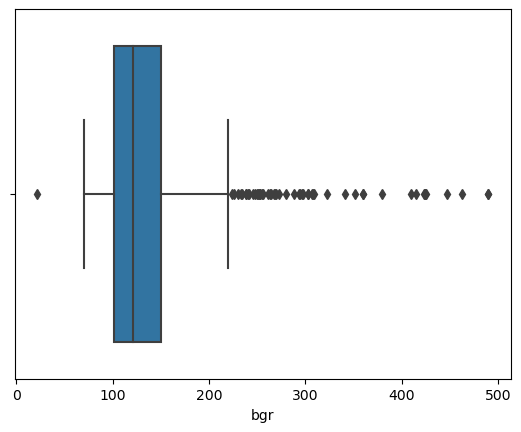

**************************************************
Column : bu


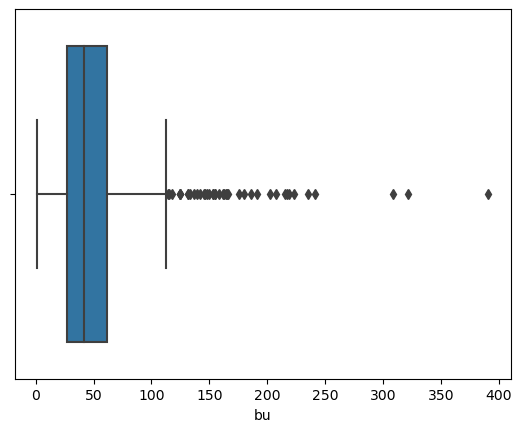

**************************************************
Column : sc


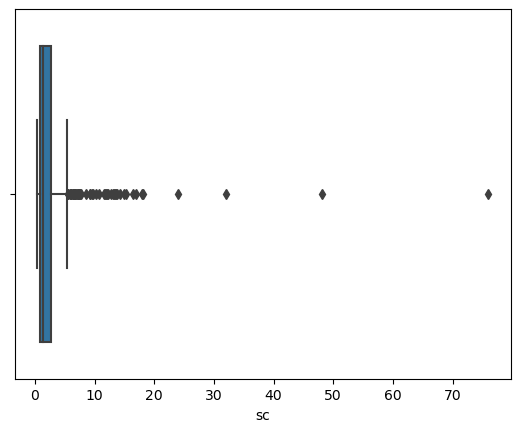

**************************************************
Column : sod


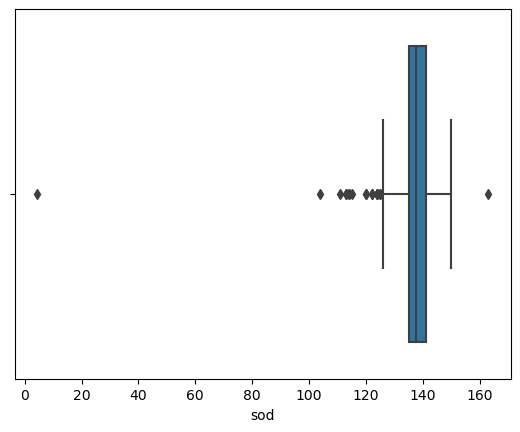

**************************************************
Column : pot


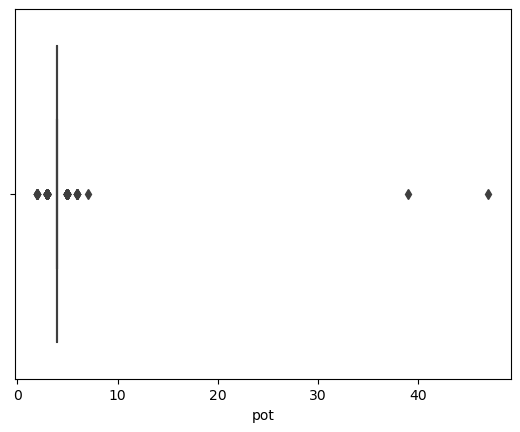

**************************************************
Column : hemo


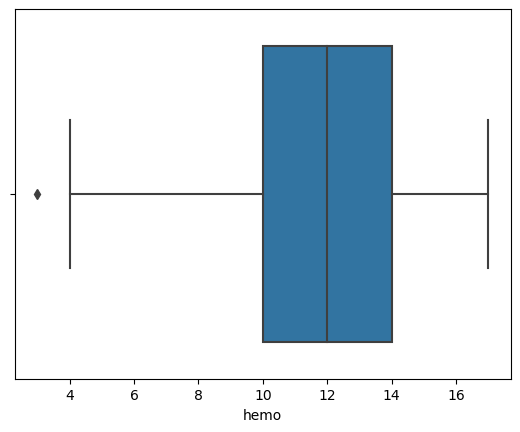

**************************************************
Column : pcv


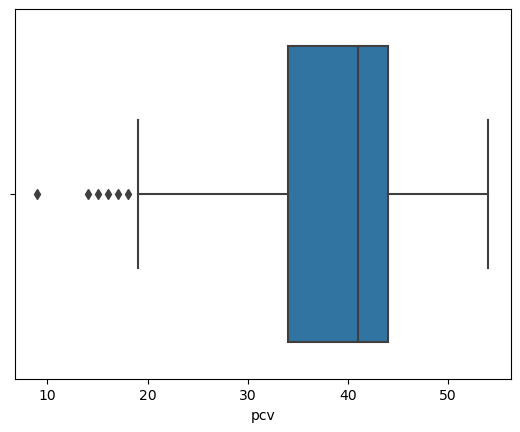

**************************************************
Column : wc


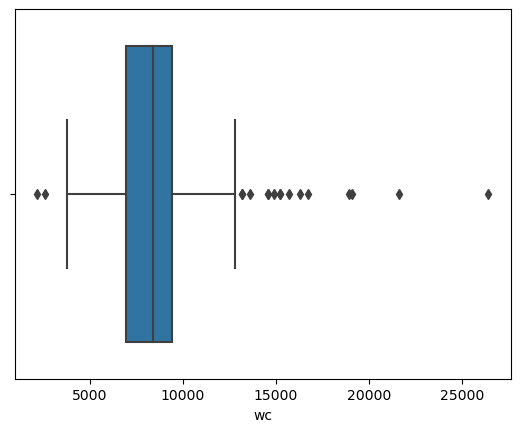

**************************************************
Column : rc


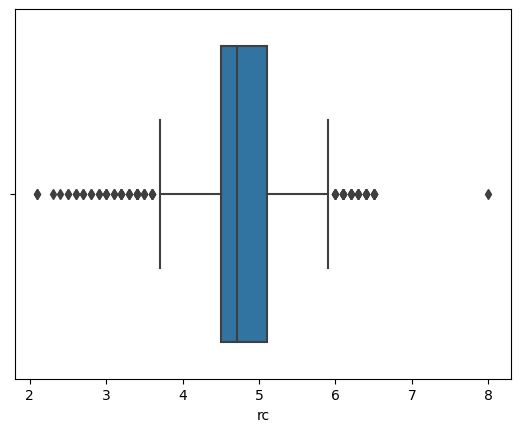

**************************************************


In [49]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype =='float64' or df[i].dtype == 'int32':
        print('Column :',i)
        sns.boxplot(df[i])
        plt.show()
        print('**'*25)

In [50]:
def outliers_detect(data):
    for i in data.describe():
        if df[i].dtype == 'float64':
            print(i)
            print("............")
            Q1 = data.describe().at['25%',i]
            Q3 = data.describe().at['75%',i]
            IQR = Q3-Q1
            LTV = Q1 - 1.5*IQR
            UTV = Q3 + 1.5*IQR
            print("Lower outliers")
            print(".........")
            l = list(data[data[i]<LTV][i])##doubt
            l.sort()
            print(l)
            data[i] = data[i].mask(data[i]<LTV, LTV)
            print("upper outliers")
            print('.........')
            u = list(data[data[i]>UTV][i])
            u.sort()
            print(u)
            data[i] = data[i].mask(data[i]>UTV, UTV)      

In [51]:
outliers_detect(df)

sg
............
Lower outliers
.........
[1.005, 1.005, 1.005, 1.005, 1.005, 1.005, 1.005]
upper outliers
.........
[]
bu
............
Lower outliers
.........
[]
upper outliers
.........
[114.0, 115.0, 118.0, 125.0, 125.0, 125.0, 132.0, 132.0, 133.0, 137.0, 139.0, 142.0, 145.0, 146.0, 148.0, 150.0, 153.0, 153.0, 155.0, 155.0, 158.0, 162.0, 163.0, 164.0, 165.0, 166.0, 176.0, 180.0, 186.0, 191.0, 202.0, 208.0, 215.0, 217.0, 219.0, 223.0, 235.0, 241.0, 309.0, 322.0, 391.0]
sc
............
Lower outliers
.........
[]
upper outliers
.........
[5.6, 5.6, 5.9, 6.0, 6.0, 6.1, 6.1, 6.3, 6.3, 6.4, 6.5, 6.5, 6.7, 6.7, 6.8, 7.1, 7.2, 7.2, 7.3, 7.3, 7.3, 7.3, 7.5, 7.7, 8.5, 9.2, 9.3, 9.6, 9.7, 10.2, 10.8, 11.5, 11.8, 11.9, 12.0, 12.2, 12.8, 13.0, 13.3, 13.4, 13.5, 13.8, 14.2, 15.0, 15.2, 16.4, 16.9, 18.0, 18.1, 24.0, 32.0, 48.1, 76.0]
sod
............
Lower outliers
.........
[4.5, 104.0, 111.0, 113.0, 113.0, 114.0, 114.0, 115.0, 120.0, 120.0, 122.0, 122.0, 124.0, 124.0, 124.0, 125.0, 125.0]
upper

columns : sg


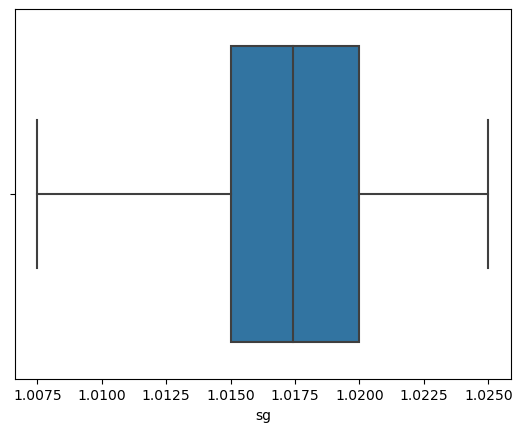

columns : bu


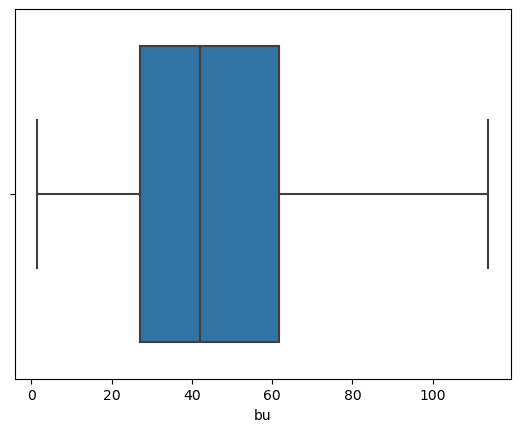

columns : sc


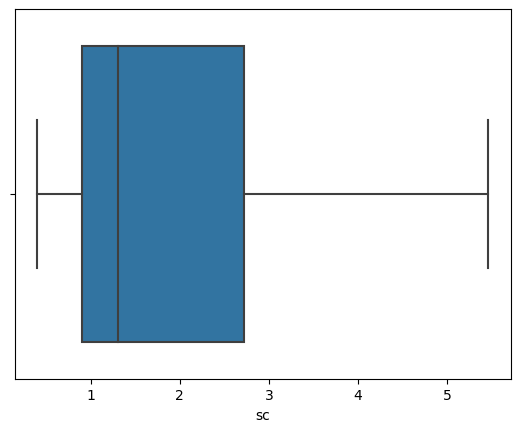

columns : sod


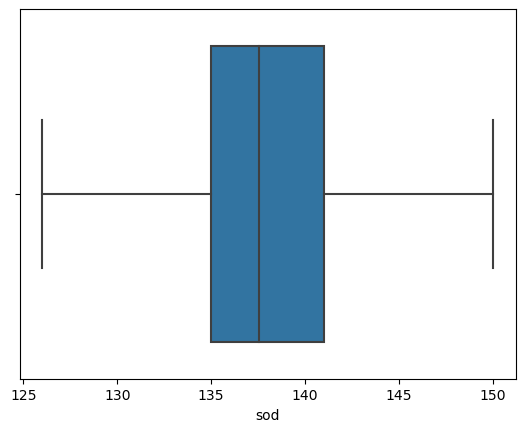

columns : wc


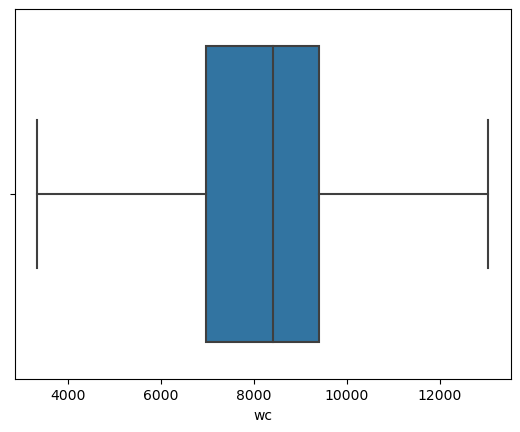

columns : rc


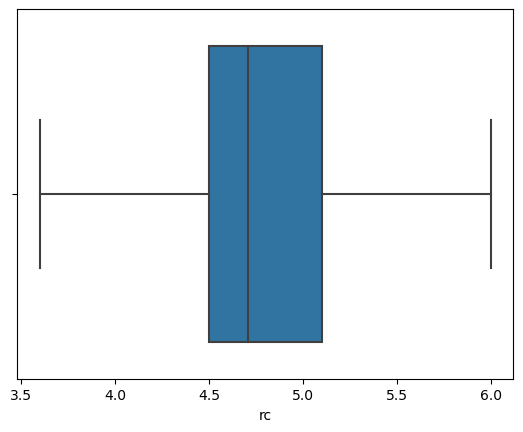

In [52]:
for i in df.describe():
    if df[i].dtype == 'float64':
        print('columns :',i)
        sns.boxplot(df[i])
        plt.show()

In [53]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017452,0.90000,0.395000,145.062500,50.277687,2.071406,138.115004,4.115000,12.0875,39.260000,8276.716199,4.739435
std,16.982996,13.489785,0.005277,1.31313,1.040038,75.260774,30.283953,1.630716,5.281317,2.867461,2.7411,8.191162,2029.666146,0.674872
min,2.000000,50.000000,1.007500,0.00000,0.000000,22.000000,1.500000,0.400000,126.000000,2.000000,3.0000,9.000000,3337.500000,3.600000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.0000,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.017408,0.00000,0.000000,121.000000,42.000000,1.300000,137.528754,4.000000,12.0000,41.000000,8406.122449,4.707435
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.000000,14.0000,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,113.875000,5.462500,150.000000,47.000000,17.0000,54.000000,13037.500000,6.000000


# FEATURE ENGINEERING

In [125]:
df.corr()

,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,hemo,pcv,wc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.136316,0.085918,0.186750,0.014904,0.102286,0.157401,0.042427,0.230731,0.262934,0.261552,-0.106496,-0.178833,-0.210819,0.111037,0.395073,0.364306,0.231419,-0.156581,0.094772,0.052938,0.227842
bp,0.136316,1.000000,0.123518,0.189561,0.150384,0.156231,0.056808,0.110164,0.150180,0.184925,0.256383,-0.133947,-0.271804,-0.285876,0.029927,0.266901,0.226489,0.084135,-0.175054,0.056902,0.195134,0.293693
al,0.085918,0.123518,1.000000,0.287751,0.394844,0.561713,0.417868,0.377935,0.293150,0.374260,0.413282,-0.393171,-0.461993,-0.470819,0.173737,0.406057,0.308101,0.200957,-0.303145,0.411080,0.229556,0.531562
su,0.186750,0.189561,0.287751,1.000000,0.092940,0.190062,0.168091,0.119399,0.627002,0.127732,0.165866,-0.144090,-0.151056,-0.180658,0.176524,0.254268,0.430514,0.229301,-0.069216,0.116442,0.042464,0.294555
rbc,0.014904,0.150384,0.394844,0.092940,1.000000,0.377394,0.102948,0.184402,0.138615,0.236288,0.264589,-0.228141,-0.281068,-0.278263,0.013207,0.140538,0.145646,0.111493,-0.160868,0.199285,0.107625,0.282642
pc,0.102286,0.156231,0.561713,0.190062,0.377394,1.000000,0.520118,0.330401,0.247665,0.323230,0.339671,-0.293073,-0.406544,-0.417339,0.073674,0.291719,0.201032,0.172295,-0.274985,0.350227,0.260566,0.375154
pcc,0.157401,0.056808,0.417868,0.168091,0.102948,0.520118,1.000000,0.275082,0.195223,0.208244,0.217319,-0.220846,-0.270110,-0.297980,0.136915,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,0.042427,0.110164,0.377935,0.119399,0.184402,0.330401,0.275082,1.000000,0.079162,0.181999,0.209676,-0.154705,-0.199977,-0.188624,0.096590,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871
bgr,0.230731,0.150180,0.293150,0.627002,0.138615,0.247665,0.195223,0.079162,1.000000,0.150860,0.184955,-0.251243,-0.253390,-0.255274,0.132513,0.367816,0.503254,0.207020,-0.177285,0.094806,0.112449,0.379321
bu,0.262934,0.184925,0.374260,0.127732,0.236288,0.323230,0.208244,0.181999,0.150860,1.000000,0.826381,-0.407027,-0.597610,-0.567226,0.076290,0.499581,0.394692,0.262308,-0.298584,0.314807,0.429100,0.438210


In [54]:
del df['sg']
del df['pot']
del df['rc']

# DATA PREPROCESSING

In [55]:
for i in df.columns:
    if df[i].dtype == object:
        print(i)
        print('.....')
        print(df[i].nunique())
        print(df[i].value_counts())

rbc
.....
2
normal      353
abnormal     47
Name: rbc, dtype: int64
pc
.....
2
normal      324
abnormal     76
Name: pc, dtype: int64
pcc
.....
2
notpresent    358
present        42
Name: pcc, dtype: int64
ba
.....
2
notpresent    378
present        22
Name: ba, dtype: int64
htn
.....
2
no     253
yes    147
Name: htn, dtype: int64
dm
.....
2
no     263
yes    137
Name: dm, dtype: int64
cad
.....
2
no     366
yes     34
Name: cad, dtype: int64
appet
.....
2
good    318
poor     82
Name: appet, dtype: int64
pe
.....
2
no     324
yes     76
Name: pe, dtype: int64
ane
.....
2
no     340
yes     60
Name: ane, dtype: int64
classification
.....
2
ckd       250
notckd    150
Name: classification, dtype: int64


In [56]:
##label encoding
df['rbc'].replace({'normal': 0,'abnormal':1},inplace = True)
df['pc'].replace({'normal': 0,'abnormal':1},inplace = True)
df['pcc'].replace({'notpresent': 0,'present':1},inplace = True)
df['ba'].replace({'notpresent': 0,'present':1},inplace = True)
df['htn'].replace({'no': 0,'yes':1},inplace = True)
df['dm'].replace({'no': 0,'yes':1},inplace = True)
df['cad'].replace({'no': 0, 'yes':1},inplace = True)
df['appet'].replace({'good': 1,'poor':0},inplace = True)
df['pe'].replace({'no': 0,'yes':1},inplace = True)
df['ane'].replace({'no': 0 ,'yes':1},inplace = True)
df['classification'].replace({'notckd': 0,'ckd': 1},inplace = True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    int32  
 1   bp              400 non-null    int32  
 2   al              400 non-null    int32  
 3   su              400 non-null    int32  
 4   rbc             400 non-null    int64  
 5   pc              400 non-null    int64  
 6   pcc             400 non-null    int64  
 7   ba              400 non-null    int64  
 8   bgr             400 non-null    int32  
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  hemo            400 non-null    int32  
 13  pcv             400 non-null    int32  
 14  wc              400 non-null    float64
 15  htn             400 non-null    int64  
 16  dm              400 non-null    int64  
 17  cad             400 non-null    int

# Predictive modeling

In [59]:
#scaling
from sklearn.preprocessing import StandardScaler

In [60]:
sc = StandardScaler()

INDEPENDENT AND DEPENDENT VARIABLES

In [61]:
x=df.drop('classification',axis =1)
y=df['classification']

In [62]:
x

,age,bp,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,hemo,pcv,wc,htn,dm,cad,appet,pe,ane
id,,,,,,,,,,,,,,,,,,,,,
0,48,80,1,0,0,0,0,0,121,36.0,1.2,137.528754,15,44,7800.0,1,1,0,1,0,0
1,7,50,4,0,0,0,0,0,121,18.0,0.8,137.528754,11,38,6000.0,0,0,0,1,0,0
2,62,80,2,3,0,0,0,0,423,53.0,1.8,137.528754,9,31,7500.0,0,1,0,0,0,1
3,48,70,4,0,0,1,1,0,117,56.0,3.8,126.000000,11,32,6700.0,1,0,0,0,1,1
4,51,80,2,0,0,0,0,0,106,26.0,1.4,137.528754,11,35,7300.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,0,0,0,0,0,0,140,49.0,0.5,150.000000,15,47,6700.0,0,0,0,1,0,0
396,42,70,0,0,0,0,0,0,75,31.0,1.2,141.000000,16,54,7800.0,0,0,0,1,0,0
397,12,80,0,0,0,0,0,0,100,26.0,0.6,137.000000,15,49,6600.0,0,0,0,1,0,0


In [63]:
y

id
0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [64]:
x.iloc[:,[0,1,8,9,10,11,13,14]]

,age,bp,bgr,bu,sc,sod,pcv,wc
id,,,,,,,,
0,48,80,121,36.0,1.2,137.528754,44,7800.0
1,7,50,121,18.0,0.8,137.528754,38,6000.0
2,62,80,423,53.0,1.8,137.528754,31,7500.0
3,48,70,117,56.0,3.8,126.000000,32,6700.0
4,51,80,106,26.0,1.4,137.528754,35,7300.0
...,...,...,...,...,...,...,...,...
395,55,80,140,49.0,0.5,150.000000,47,6700.0
396,42,70,75,31.0,1.2,141.000000,54,7800.0
397,12,80,100,26.0,0.6,137.000000,49,6600.0


In [65]:
x.iloc[:,[0,1,8,9,10,11,13,14]] = sc.fit_transform(x.iloc[:,[0,1,8,9,10,11,13,14]])

TRAIN TEST SPILT

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.2,random_state=12)

In [68]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 21), (80, 21), (320,), (80,))

In [69]:
x_train.shape,y_train.shape

((320, 21), (320,))

In [70]:
y_train.value_counts()

1    202
0    118
Name: classification, dtype: int64

BALANCING IMBALANCED DATA

In [71]:
# pip install imblearn

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
smote = SMOTE(sampling_strategy = 1, random_state = 0,k_neighbors = 4)

In [74]:
x_train_smote ,y_train_smote = smote.fit_resample(x_train,y_train)

LOGISTIC REGRESSION

In [75]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [76]:
log.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [77]:
x_train_smote.shape ,y_train_smote.shape

((404, 21), (404,))

In [78]:
y_train_smote.value_counts()

1    202
0    202
Name: classification, dtype: int64

In [79]:
log.coef_,log.intercept_

(array([[ 0.068042  ,  0.73520115,  2.02624606,  0.62249297,  0.3196724 ,
          0.5225842 ,  0.05767638,  0.02531572,  0.81271878, -0.04131551,
          1.98230576, -0.56837035, -1.27463392, -1.00587591, -0.12065307,
          0.59091314,  1.04110286,  0.03463219, -1.08849968,  0.86646242,
          0.52608746]]),
 array([18.00861768]))

In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,confusion_matrix
from sklearn.metrics import plot_confusion_matrix,roc_curve,auc
from sklearn.model_selection import cross_val_score

In [81]:
y_testpred_log = log.predict(x_test)

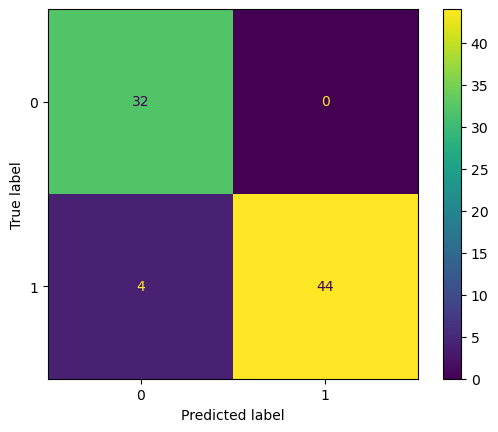

In [82]:
import matplotlib.pyplot as plt 
plt.show(plot_confusion_matrix(log,x_test,y_test))

In [83]:
print("Classification Report:\n",classification_report(y_test, y_testpred_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.92      0.96        48

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [84]:
#Another way to plot confusion matrix

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [86]:
log.classes_

array([0, 1], dtype=int64)

In [87]:
cm = confusion_matrix(y_test,y_testpred_log,labels = log.classes_)
print(cm)

[[32  0]
 [ 4 44]]


In [88]:
cm_dis = ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = ['no disease','disease'])

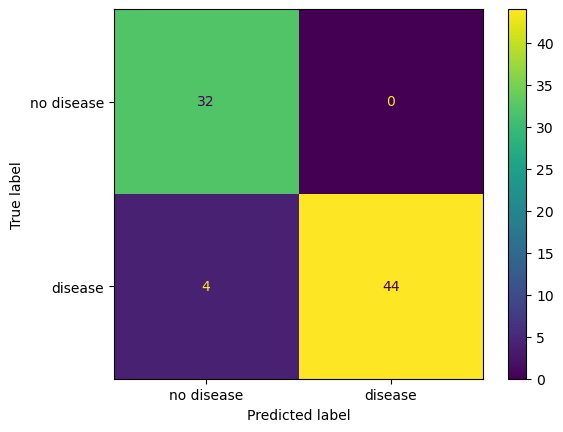

In [89]:
cm_dis.plot()

In [90]:
print("Classification Report:\n",classification_report(y_test, y_testpred_log))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.92      0.96        48

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [91]:
##ROC Curve and AUC score

In [92]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [93]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color = 'orange',label = 'ROC')
    plt.plot([0,1],[0,1], color = 'darkblue' , linestyle = '-')
    plt.xlabel('False positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [94]:
probs = log.predict_proba(x_test)

In [95]:
probs = probs[:,1]

In [96]:
auc = roc_auc_score( y_test, probs)

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

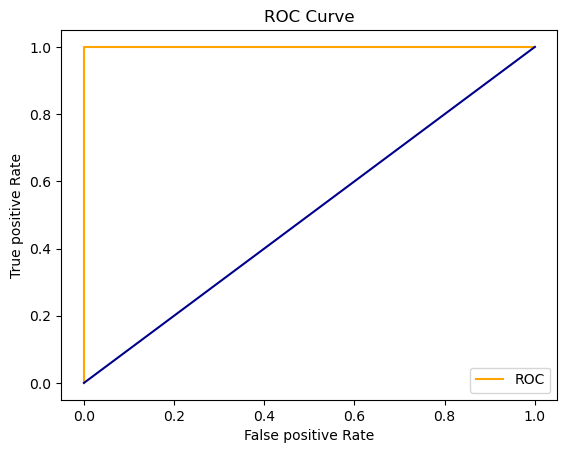

In [98]:
plot_roc_curve(fpr, tpr)

KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, p= 2)

In [100]:
knn.fit(x_train_smote,y_train_smote)
y_testpred_knn = knn.predict(x_test)

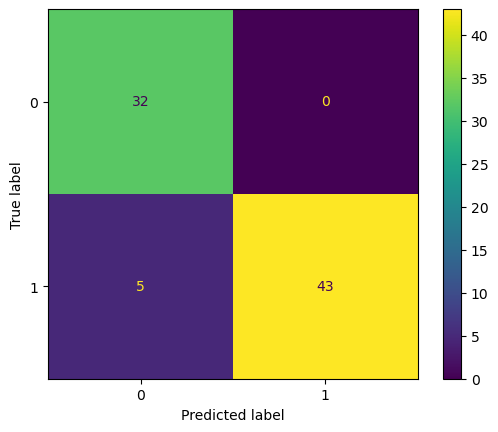

In [101]:
plt.show(plot_confusion_matrix(knn,x_test,y_test))

In [102]:
print('classification Report:\n',classification_report(y_test, y_testpred_knn))

classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.90      0.95        48

    accuracy                           0.94        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



SVM

In [103]:
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf',gamma = 5)

In [104]:
svc.fit(x_train_smote,y_train_smote)
y_testpred_svc = svc.predict(x_test)

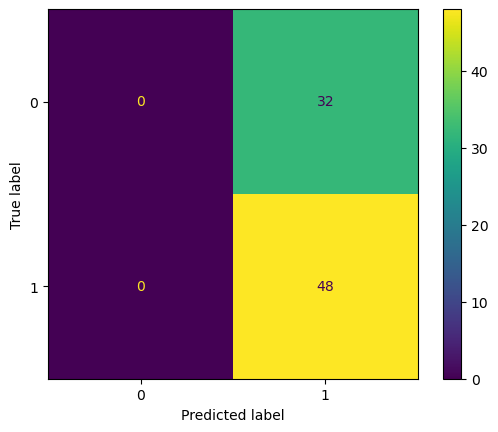

In [105]:
plt.show(plot_confusion_matrix(svc,x_test,y_test))

In [106]:
print("classification Report\n" ,classification_report(y_test,y_testpred_svc))

classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.60      1.00      0.75        48

    accuracy                           0.60        80
   macro avg       0.30      0.50      0.37        80
weighted avg       0.36      0.60      0.45        80



GAUSSIAN CLASSIFIER

In [107]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [108]:
nb.fit(x_train_smote,y_train_smote)
y_testpred_nb = nb.predict(x_test)

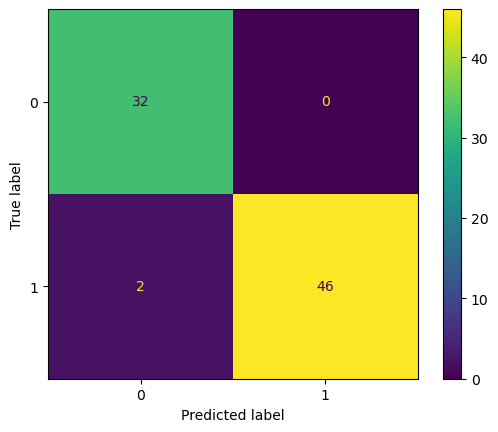

In [109]:
plt.show(plot_confusion_matrix(nb,x_test,y_test))

In [110]:
print("classification_report\n",classification_report(y_test,y_testpred_nb))

classification_report
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.96      0.98        48

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



DECISION TREE CLASSIFIER

In [111]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)

In [112]:
dt.fit(x_train_smote,y_train_smote)
y_testpred_dt = dt.predict(x_test)

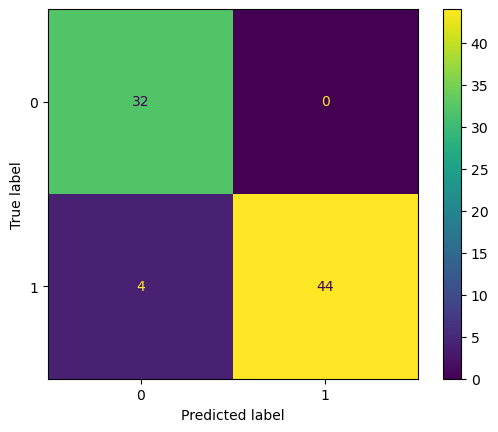

In [113]:
plt.show(plot_confusion_matrix(dt,x_test,y_test))

In [114]:
print(classification_report(y_test,y_testpred_dt))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.92      0.96        48

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



RANDOM FOREST CLASSIFIER

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 2, max_depth = 2,criterion = 'entropy')

In [116]:
rf.fit(x_train_smote,y_train_smote)
y_testpred_rf = rf.predict(x_test)

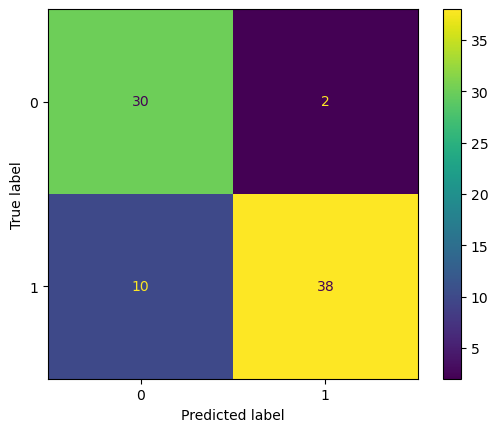

In [117]:
plt.show(plot_confusion_matrix(rf,x_test,y_test))

In [118]:
print(classification_report(y_test,y_testpred_rf))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        32
           1       0.95      0.79      0.86        48

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.87      0.85      0.85        80



XGBOOST

In [119]:
#pip install xgboost

In [120]:
from xgboost import XGBClassifier

In [121]:
xgb = XGBClassifier(n_estimators = 10,reg_alpha =0.5)

In [122]:
xgb.fit(x_train_smote,y_train_smote)
y_testpred_xgb = xgb.predict(x_test)

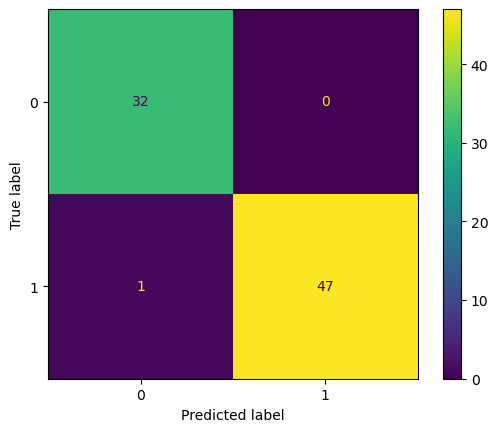

In [123]:
plt.show(plot_confusion_matrix(xgb,x_test,y_test))

In [124]:
print(classification_report(y_test,y_testpred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.98      0.99        48

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



INSIGHTS: XGBoost and DecisionTreeClassifier are giving better results compared to other models.